### DAV 5400 Fall 2019 Week 10 Assignment

<img src=" ALASKA.jpg">

### Question 1
Create a .CSV file that includes all of the information shown above. You are required to use a “wide”
structure similar to how the information appears above, so that you can practice both data tidying and the
data wrangling transformations described in Chapter 8 of the “Python for Data Analysis” textbook. Load your
.CSV file into you GitHub repository

I will solve Question one in two ways
#### 1.1 First way by 
is through a simple notepad https://github.com/OMS1996/DAV-5400/blob/master/QuestionOne.csv , i will do use this for the rest of the questions.

#### 1.2 Second way
Getting the necassary packages and creating a numpy array with all the numeric values and then resizing it into a 4 by 5 matrix which is the required format
##### Steps:
- Transforming the matrix into a data frame and rename the coloumns accordingly.
- Add additional coloumns
- Re-arranging the coloumns to come a step closer to the required figure

In [1]:
# Importing the necassary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Creating a Numpy array
Numpy_Array = np.array([497,221,212,503,1841,62,12,20,102,305,694,4840,383,320,201,117,415,65,129,61]).reshape(4,5) 
#Converting it into a data frame
frame = pd.DataFrame(Numpy_Array)
#Adding the col
frame.columns=['Los Angeles','Phoenix','San Diego','San Francisco','Seattle']
# adding the state and status
frame['Airline']=['ALASKA','ALASKA','AMWEST','AMWEST']
frame['status']=['on time','delayed','on time','delayed']
# Adding the coloumn name
cols = ['Airline','status','Los Angeles','Phoenix','San Diego',
        'San Francisco',
        'Seattle']
# Rearranging the coloumns
frame = frame[cols]
# visualising it the same way on the PDF
frame.set_index(['Airline', 'status'], inplace=True)
# Printing the frame
frame

Los Angeles  Phoenix  San Diego  San Francisco  Seattle
Airline status                                                          
ALASKA  on time          497      221        212            503     1841
        delayed           62       12         20            102      305
AMWEST  on time          694     4840        383            320      201
        delayed          117      415         65            129       61

Creating a CSV file and store it on harddrive

In [2]:
frame.to_csv('Question_One_in_Code.csv',index=False) # end of question 1

### Question 2
Read your .CSV file from your GitHub repository into a Jupyter Notebook, and use your knowledge of
combining and reshaping data in Pandas to tidy and transform your data. To get started, think about how you
would want the data to appear if it were converted to “long” format, e.g., how would you define a “single
observation” for the data shown in the graphic?; How many key values are associated with each data value?;
How many columns should your long format structure contain based on the information provided in the
graphic shown above?; What would the column headings for the long structure be?; etc. Use your answers to
these questions to guide your reshaping/transformational work on the data. Your reshaping/transformational
steps must include converting the above table to a “tidy” long format. Additional transformational steps
(e.g., filling in missing data values, renaming columns, etc.) should be performed as needed to ensure that
your data is, in fact, “tidy”


##### 2.1 Reading data from my Github
Reading the comma seperated value file that was created in first way and that was uplouded on github

In [3]:
# Reading the data into a CSV file
data =pd.read_csv('https://raw.githubusercontent.com/OMS1996/DAV-5400/master/QuestionOne.csv')
# Printing the data
data

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


#### 2.2 Making the data tidy

##### 2.2.1 Removing the Null values
Removing the rows with all the NULL values using dropna() and setting the parameter 'how' to all

In [4]:
#Removing the rows with all the NULL
data=data.dropna(how='all')
# Printing
data

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [5]:
# Renaming all the coloumns
data.columns=['Airline','Status','Los Angeles','Phoenix','San Diego','San Francisco','Seattle']
# Printing the data
x=data
x

,Airline,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


##### 2.2.2 Filling in the Null values
- Filling all the NaN values with previous values and then overwriting the coloumn in the data frame with a new and improved version of it Using the method fillna() and assigning the parameter 'method' = ffill

- P.S: the reason i used copy is to avoid the warning message

In [6]:
#Overwriting the missing NaN values
data['Airline']= data['Airline'].fillna(method='ffill').copy()
# Printing the values
data

C:\Users\Morra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Airline,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AMWEST,delayed,117.0,415.0,65.0,129.0,61.0


##### 2.2.3 Resetting the indexes
Resetting the Indexes within the data frame, and deleting the extra index coloumn because it is no longer needed

In [7]:
# Resetting the index
data = data.reset_index()
# deleting the coloumn
del data['index']
# Printing
data

,Airline,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
2,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
3,AMWEST,delayed,117.0,415.0,65.0,129.0,61.0


##### 2.2.4   Changing from "Wide" to "Long" Format

###### 2.2.4.1 Questions & Anwers for Q2

<br>
- how would you define a “single observation” for the data shown in the graphic?
</br>

<br>
Answer: Each observation is a certain configuration of state,status,city and frequncy and unless the frequency is the same it should be unique.<br>
</br>

<br>
- How many key values are associated with each data value?
</br>

<br>
Answer: 2 keys.<br>
</br>

<br>
- How many columns should your long format structure contain based on the information provided in the graphic shown above?
<br>
</br>
Answer: There should be 4 columns and there should be 20 elements in it.<br><br>
</br>
- What would the column headings for the long structure be?
<br>
Answer: It should be City and Frequency, denoting the cities and the number of flights
</br>

###### 2.2.4.2 Melting the Wide format into 4 coloumn thin long format
- Using the melt function on the two ids state and status.
- Saving the original wide version by adding the df variable.
- Changing the name from Value to Frequency

In [8]:
# Storing the data
df = data
# Using the melt function on state and status
df = pd.melt(df, id_vars=['Airline','Status'], var_name='City')
# Choosing a suitable name replacement for the coloumn name value
df=df.rename(columns={'value': 'Frequency'})
df

,Airline,Status,City,Frequency
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AMWEST,on time,Los Angeles,694.0
3,AMWEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AMWEST,on time,Phoenix,4840.0
7,AMWEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


###### 2.2.5
Saving the New long data frame into a CSV

In [9]:
# Saving the data frame into a CSV file
df.to_csv('Question_Two_in_Code.csv',index=False)

## Question 3
Using your reshaped/transformed data, perform analysis to compare the arrival delays for the two airlines.

### 3.1 Questions 
- Q1)For each city, which airline had the best on time performance?
<br>Answer:AM WEST has has much higher on time flights for san diego and los and angelos while ALASKA has a higher on time flights frequency for seattle and san francisco, Which due to the fact that AM performs better in more cities and a great deal better in pheonix in particular where there are alot of flights, i am inclined to say that AM WEST is much better than ALASKA in arriving on time, Please refer to the plot A & B</br>
- Q2)Which airline had the best overall on time performance?
<br>Answer: Despite the fact that AM WEST is higher on the On time is slightly worse on the delayed time average so ALASKA has a higher performance rate, Please refer to the plot A & B</br>
- The Optional question Q3) Regarding the ratio between Delays and on time flights which on is favored here?
<br>Answer: On time flights in both airlines are far more than the delays

### 3.1.1 Plot A & Summary statistics
Here in Plot A, we use a barchart to understand the differences between AM WEST and ALASKA for each city from a frequency prespective

			Plot A



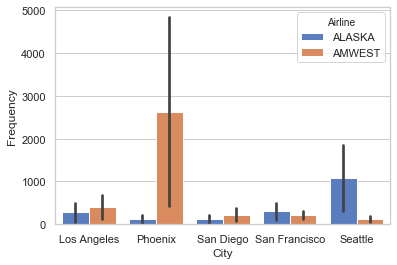

In [10]:
# Styling and Using Seaborn
sns.set(style="whitegrid")
# Using a barplot to show the frequency comparison
print("\t\t\tPlot A\n")
g = sns.barplot(x="City", y="Frequency",hue="Airline",data=df, palette="muted")

First i split the dataset into two, one for ALASKA the other is for AM WEST

In [11]:
# SPlitting the data
df_ALASKA=df[df["Airline"]=="ALASKA"]
df_AMWEST=df[df["Airline"]=="AMWEST"]
# Formatting
print("\t\t\t The full summary statistics for the dataset ")
# More formatting
print("The on time data set: ")
print(df_ALASKA.describe(),"\n")
# More more formatting
print("The AMWEST data set: ")
print(df_AMWEST.describe())

			 The full summary statistics for the dataset 
The on time data set: 
         Frequency
count    10.000000
mean    377.500000
std     544.246523
min      12.000000
25%      72.000000
50%     216.500000
75%     449.000000
max    1841.000000 

The AMWEST data set: 
        Frequency
count    10.00000
mean    722.50000
std    1460.10519
min      61.00000
25%     120.00000
50%     260.50000
75%     407.00000
max    4840.00000


### 3.1.2 Plot B & Summary statistics

Here in Plot B, we use a barchart to understand the differences between AM WEST and ALASKA for each city from a frequency prespective
only this time we split them into delayed and ontime categories

			Plot B



C:\Users\Morra\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


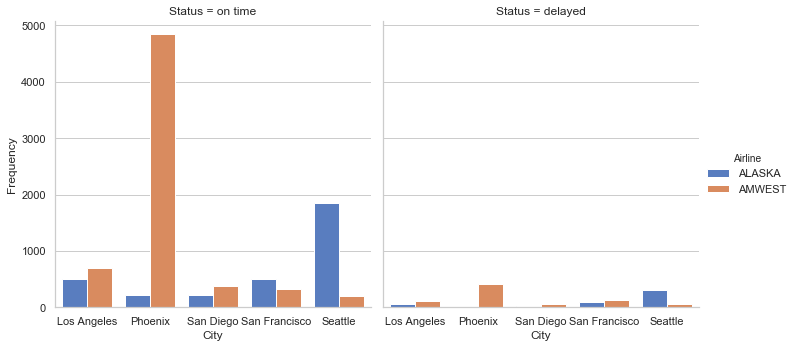

In [12]:
# Formatting
print("\t\t\tPlot B\n")
# Building a barplot using seaborn
sns.factorplot(x="City", y="Frequency",col="Status",hue="Airline",data=df, palette="muted", kind="bar");

In [13]:
# Splitting into two data sets
df_ontime=df[df["Status"]=="on time"]
df_delayed=df[df["Status"]=="delayed"]
# Formatting
print("\t\t\t The full summary statistics for the dataset ")
# Getting summary statistics
print("The on time data set: ")
print(df_ontime.describe(),"\n")
print("The delayed data set: ")
print(df_delayed.describe())

			 The full summary statistics for the dataset 
The on time data set: 
         Frequency
count    10.000000
mean    971.200000
std    1443.280045
min     201.000000
25%     245.750000
50%     440.000000
75%     646.250000
max    4840.000000 

The delayed data set: 
        Frequency
count   10.000000
mean   128.800000
std    130.138217
min     12.000000
25%     61.250000
50%     83.500000
75%    126.000000
max    415.000000


### Question 4
#### 4.1 Problem describtion
Finally, given your “tidy” long format structure, consider what, if any, changes you would make to the
visual presentation of the data if you were then asked to transform your “long” data back into a “wide”
format: would you mimic the structure of the graphic shown above? If not, how might you transform your
“long” data to “wide” format to make its “wide” presentation easier to understand and work with? Provide an
example of your recommendation.

#### Answer to 4.1
I would use the the flavor of wide format in section 4.2 to perform calculations, however for visual presentation i would use a pivot table such as the one in section 4.3 because it is particularly useful for aggregating which is frequently needed in reports


###### 4.2 Wide format (Normal format)

In [14]:
x

,Airline,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AMWEST,delayed,117.0,415.0,65.0,129.0,61.0


###### 4.3 Wide format Pivor table

Pivot Table
In this form, aggregating the ratings grouped by Airlines

In [15]:
# Formatting
print("\t\t\t Pivot table in wide format")
# Grouping the data by Airline
df['idx'] = df.groupby('Airline').cumcount()
#Building the pivot table
print(df.pivot(index='Airline',columns='idx')[['Status','City','Frequency']])

			 Pivot table in wide format
          Status                                                        \
idx            0        1        2        3        4        5        6   
Airline                                                                  
ALASKA   on time  delayed  on time  delayed  on time  delayed  on time   
AMWEST   on time  delayed  on time  delayed  on time  delayed  on time   

                                    ... Frequency                        \
idx            7        8        9  ...         0      1       2      3   
Airline                             ...                                   
ALASKA   delayed  on time  delayed  ...     497.0   62.0   221.0   12.0   
AMWEST   delayed  on time  delayed  ...     694.0  117.0  4840.0  415.0   

                                                   
idx          4     5      6      7       8      9  
Airline                                            
ALASKA   212.0  20.0  503.0  102.0  1841.0  305.0  
AMWEST   383.0

###### Thank you from Omar M. Hussein